# Insurance Fraud Detection

>. To build a classification methodology to determine whether a customer is placing a fraudulent insurance claim.

## How to run this notebook??

- ensure the input data absolute path is '../data/insuranceFraud.csv' 
- import the libraries (1.2)
- run all the functions (1.10)
- run sequentially (1.3 onwards)

## Importing the Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from joblib import Parallel, delayed
import time 
from datetime import datetime
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as shc

from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
from time import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## Reading the Data

In [9]:
df_main=pd.read_csv('../data/insuranceFraud.csv')
df_main.head(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698       09-06-2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [10]:
df_main.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [11]:
now = datetime.now()
year = now.date().year

df=df_main.copy()
#creating two new columns. the data frame df will be used in EDA for plotting of absolute values
df['vehicle_age'] = year - df['auto_year']
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       10/17/2014           OH   
1                 228   42         342868        6/27/2006           IN   
2                 134   29         687698       09-06-2000           OH   
3                 256   41         227811        5/25/1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported vehicle_age  
0              Y          17  
1              Y          14  
2              N          14  
3              Y           7  
4              N          12  

[5 rows x 40 columns]

## Exploratory Data Analysis
there are main components of exploring data:
- Understanding your variables
- Cleaning your dataset
- Analyzing relationships between variables

### List of Columns

In [12]:
print('list of parameters in the data ')
df.columns

list of parameters in the data 


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [13]:
print('number of rows in the data',df.shape[0])
print('number of columns in the data',df.shape[1])

number of rows in the data 1000
number of columns in the data 40


### Summary Statistics 

In [14]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
vehicle_age                  1000.0  1.589700e+01  6.015861e+00        6.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
vehicle_age                      11.0000      16.0      21.000        26.00

<b> Insights </b>
- all columns have count of 200 i.e there are no null values in any column
- but there is '?' instead

In [15]:
df.replace('?', np.NAN, inplace=True)

### Null values per column

In [16]:
#double check the null values
print('Null values in the number of columns ?')
df.isnull().any().sum()

Null values in the number of columns ?


3

In [17]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

no of nulls
>.collision_type                 178
>.property_damage                360
>.police_report_available        343

In [18]:
bool_value= False
columns_with_null = []

count_null = df.isnull().sum()
for count_ in count_null:
    if count_ > 0:
        bool_value= True

if bool_value:
    null_df = pd.DataFrame(count_null).reset_index().rename(columns={'index': 'col_name', 0:'no_of_nulls'})
    columns_with_null = list(null_df[null_df['no_of_nulls'] > 0]['col_name'].values)

In [19]:
columns_with_null

['collision_type', 'property_damage', 'police_report_available']

### Drop irrelevant columns

In [20]:
cols_to_remove = ['policy_number','policy_bind_date', 'policy_state', 'insured_zip', 'incident_location',
                              'incident_date', 'incident_state', 'incident_city', 'insured_hobbies', 'auto_make',
                              'auto_model', 'auto_year']
df.drop(columns=cols_to_remove,inplace=True)
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [21]:
df.shape[1] # from 38 we are down to 28 columns

28

### Data types of columns

In [22]:
#checking for data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null object
collision_type                 822 non-null object
incident_severity              1000 non-null object
authorities_contacted          1000 non-null object
incident_hour_of_the_day       1000 non-null int64
number_of_vehicle

from doccumentation we know , we have the following as categorical features, we need to correct the type for them

In [23]:
categorical_features = ['policy_csl', 'insured_education_level', 'incident_severity', 'insured_sex',
                                    'property_damage', 'police_report_available',
                                    'incident_type', 'collision_type', 'authorities_contacted',
                       'insured_occupation', 'insured_relationship']
categorical_label = ['fraud_reported']
categorical_columns = categorical_features + categorical_label

In [24]:
# cat_dic = {}
# for val in categorical_columns:
#     cat_dic[val] = 'category'

# df = df.astype(cat_dic)

### Imputing Null values

In [25]:
for col in columns_with_null:
    print(col)
    print(df[col].value_counts())

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
property_damage
NO     338
YES    302
Name: property_damage, dtype: int64
police_report_available
NO     343
YES    314
Name: police_report_available, dtype: int64


In [26]:
df.select_dtypes(include=['object']).head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_relationship             incident_type   collision_type  \
0              husband  Single Vehicle Collision   Side Collision   
1       other-relative             Vehicle Theft              NaN   
2            own-child   Multi-vehicle Collision   Rear Collision   
3            unmarried  Single Vehicle Collision  Front Collision   
4            unmarried             Vehicle Theft              NaN   

  incident_severity authorities_contacted property_damage  \
0      Major Damage                Police             YES   
1      Minor Damage                Police             NaN   
2      Minor Damage                Police              NO   
3      Major Damage                Police             NaN   
4      Minor Damage                  None              NO   

  police_report_available fraud_reported  
0                     YES              Y  
1                     NaN              Y  
2                      NO              N  
3                      NO              Y  
4                      NO              N

In [27]:
#for null is in categorical columns , we are simply using mode as form of imputation
for col in columns_with_null:
    #only for category columns in list of columns that has null values , fill them with mode
    if ((df[col].dtypes) == 'object'):
        df[col].fillna(df[col].mode().values[0], inplace=True)

In [28]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
vehicle_age                    0
dtype: int64

### Encoding Categorical Columns

In [29]:
#create an auto generated mapping dictionary. This dictionary can be saved and used later for prediction pipeline
dict_col_encode = {}
temp = {}
for col in categorical_columns:
    x = df[col].unique()
    temp = dict(list(enumerate(x)))
    dict_col_encode[col] = {v: k for k, v in temp.items()}
    

In [30]:
dict_col_encode #lets see the mapping dictionary

{'policy_csl': {'250/500': 0, '100/300': 1, '500/1000': 2},
 'insured_education_level': {'MD': 0,
  'PhD': 1,
  'Associate': 2,
  'Masters': 3,
  'High School': 4,
  'College': 5,
  'JD': 6},
 'incident_severity': {'Major Damage': 0,
  'Minor Damage': 1,
  'Total Loss': 2,
  'Trivial Damage': 3},
 'insured_sex': {'MALE': 0, 'FEMALE': 1},
 'property_damage': {'YES': 0, 'NO': 1},
 'police_report_available': {'YES': 0, 'NO': 1},
 'incident_type': {'Single Vehicle Collision': 0,
  'Vehicle Theft': 1,
  'Multi-vehicle Collision': 2,
  'Parked Car': 3},
 'collision_type': {'Side Collision': 0,
  'Rear Collision': 1,
  'Front Collision': 2},
 'authorities_contacted': {'Police': 0,
  'None': 1,
  'Fire': 2,
  'Other': 3,
  'Ambulance': 4},
 'insured_occupation': {'craft-repair': 0,
  'machine-op-inspct': 1,
  'sales': 2,
  'armed-forces': 3,
  'tech-support': 4,
  'prof-specialty': 5,
  'other-service': 6,
  'priv-house-serv': 7,
  'exec-managerial': 8,
  'protective-serv': 9,
  'transport-mov

<b>property_damage	,police_report_available,fraud_reported : for these 3 columns we want yes as 1 and 0 for no, so we need to modify that</b>

In [31]:
yes_no_col =['property_damage','police_report_available','fraud_reported']

In [32]:
for key in yes_no_col:
    inner_dict=dict_col_encode[key]
    for inner_key in inner_dict.keys():
        if inner_key=='YES' or inner_key=='Y':
            inner_dict[inner_key]=1
        else:
            inner_dict[inner_key]=0

In [33]:
dict_col_encode['police_report_available']

{'YES': 1, 'NO': 0}

In [34]:
df[categorical_columns].head()

policy_csl insured_education_level incident_severity insured_sex  \
0    250/500                      MD      Major Damage        MALE   
1    250/500                      MD      Minor Damage        MALE   
2    100/300                     PhD      Minor Damage      FEMALE   
3    250/500                     PhD      Major Damage      FEMALE   
4   500/1000               Associate      Minor Damage        MALE   

  property_damage police_report_available             incident_type  \
0             YES                     YES  Single Vehicle Collision   
1              NO                      NO             Vehicle Theft   
2              NO                      NO   Multi-vehicle Collision   
3              NO                      NO  Single Vehicle Collision   
4              NO                      NO             Vehicle Theft   

    collision_type authorities_contacted insured_occupation  \
0   Side Collision                Police       craft-repair   
1   Rear Collision                Police  machine-op-inspct   
2   Rear Collision                Police              sales   
3  Front Collision                Police       armed-forces   
4   Rear Collision                  None              sales   

  insured_relationship fraud_reported  
0              husband              Y  
1       other-relative              Y  
2            own-child              N  
3            unmarried              Y  
4            unmarried              N

In [35]:
#using the dictionary to encode the data in data frame
for col in categorical_columns:
    val_dic = dict_col_encode[col]
    df[col] = df[col].apply(lambda x: int(val_dic[x])) #by default it takes as float. will create an issue in Ml algorithms if target columns/label  is float not integer
    

In [36]:
df.head()

months_as_customer  age  policy_csl  policy_deductable  \
0                 328   48           0               1000   
1                 228   42           0               2000   
2                 134   29           1               2000   
3                 256   41           0               2000   
4                 228   44           2               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            0   
1                1197.22         5000000            0   
2                1413.14         5000000            1   
3                1415.74         6000000            1   
4                1583.91         6000000            0   

   insured_education_level  insured_occupation  insured_relationship  ...  \
0                        0                   0                     0  ...   
1                        0                   1                     1  ...   
2                        1                   2                     2  ...   
3                        1                   3                     3  ...   
4                        2                   2                     3  ...   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0               71610          6510           13020          52080   
1                5070           780             780           3510   
2               34650          7700            3850          23100   
3               63400          6340            6340          50720   
4                6500          1300             650           4550   

   fraud_reported  vehicle_age  
0               1           17  
1               1           14  
2               0           14  
3               1            7  
4               0           12  

[5 rows x 28 columns]

### Label imbalance?

In [37]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

#### Data Distribution

In [38]:
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

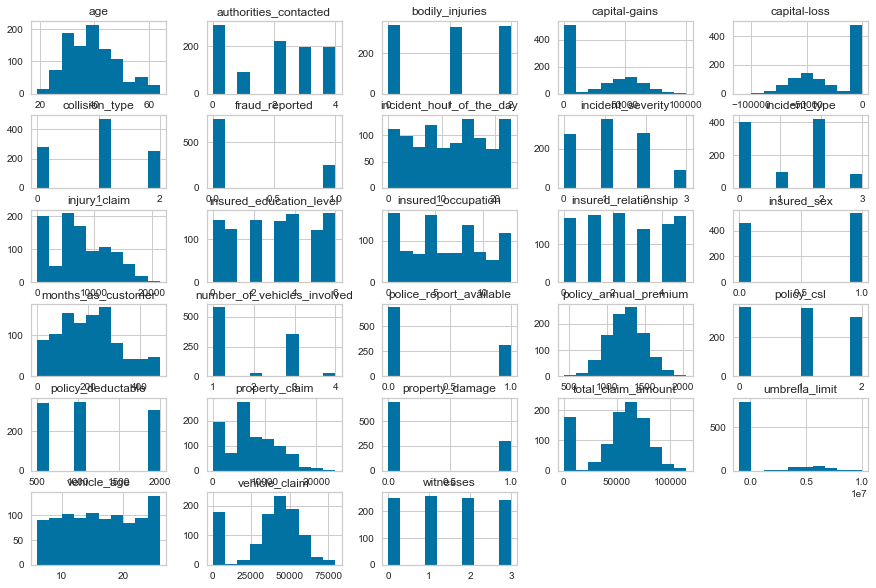

In [39]:
p=df.hist(figsize=(15,10))

C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



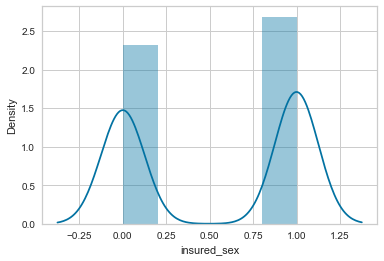

In [40]:
sns.distplot(df['insured_sex'])

C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



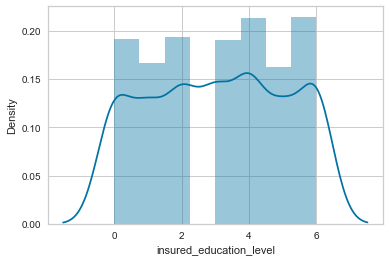

In [41]:
sns.distplot(df['insured_education_level'])

C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



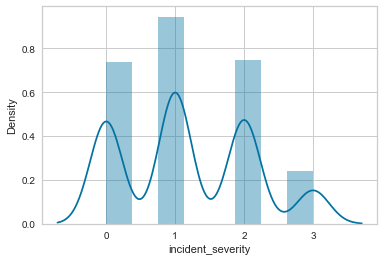

In [42]:
sns.distplot(df['incident_severity'])

###  Outlier detection

#### Box Plot 

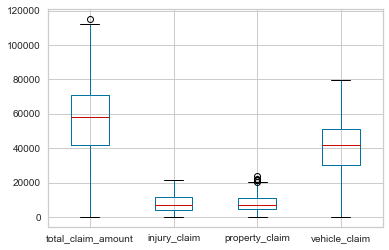

In [43]:
df[['total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', ]].boxplot()

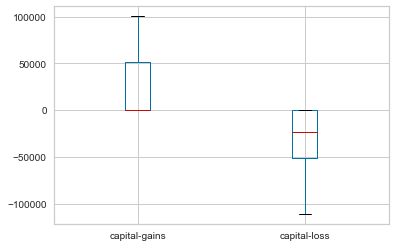

In [44]:
df[[  'capital-gains', 'capital-loss']].boxplot()

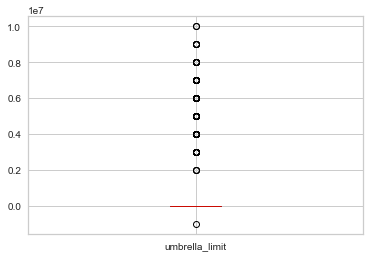

In [45]:
df[['umbrella_limit']].boxplot()

In [46]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [47]:
df.drop(index=df[df['umbrella_limit']<0].index,inplace=True)

In [48]:
df[df['umbrella_limit']<0]

Empty DataFrame
Columns: [months_as_customer, age, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_sex, insured_education_level, insured_occupation, insured_relationship, capital-gains, capital-loss, incident_type, collision_type, incident_severity, authorities_contacted, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, fraud_reported, vehicle_age]
Index: []

[0 rows x 28 columns]

### Relationship between Parameters 

#### age


In [49]:
df['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

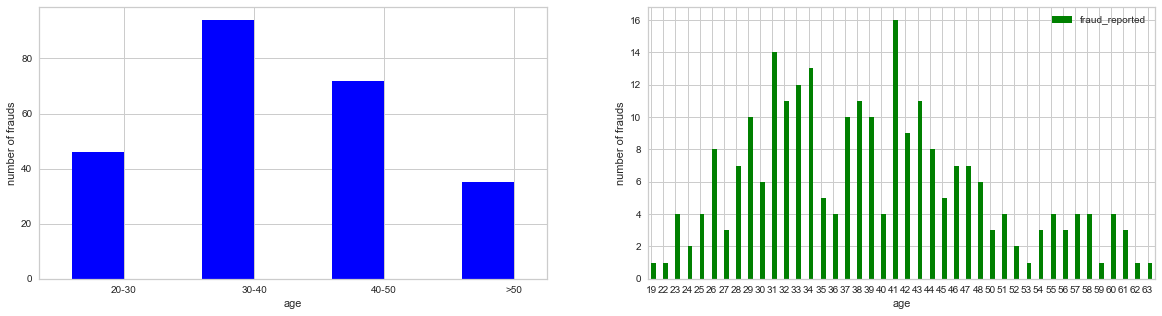

In [50]:
df1=df[df['fraud_reported']==1][['fraud_reported','age']]
#creating buckets for senior patients
def a(val):
    if (val <=30) :
        return('20-30')
    elif (val<=40):
         return('30-40')
    elif (val<=50):
         return('40-50')
    else:
        return('>50')
df1['dist']=df.age.apply(lambda x :a(x))
fig,axs=plt.subplots(1,2,figsize=(20,5))



df2=df1.groupby('dist').agg({
    'fraud_reported':'count'
})
width=0.4
df2['fraud_reported'].plot(kind='bar',rot=0,ax=axs[0],color='blue',position=1,width=width)

df1.groupby(['age']).agg({'fraud_reported':'count'}).plot(kind='bar',rot=0,ax=axs[1],color='green',position=0,width=width,label='revenue')

axs[0].set_ylabel('number of frauds')
axs[1].set_ylabel('number of frauds')

axs[0].set_xlabel('age')
axs[1].set_xlabel('age')


for ax in axs:
    ax.yaxis.grid(True)


#### Month as a customer

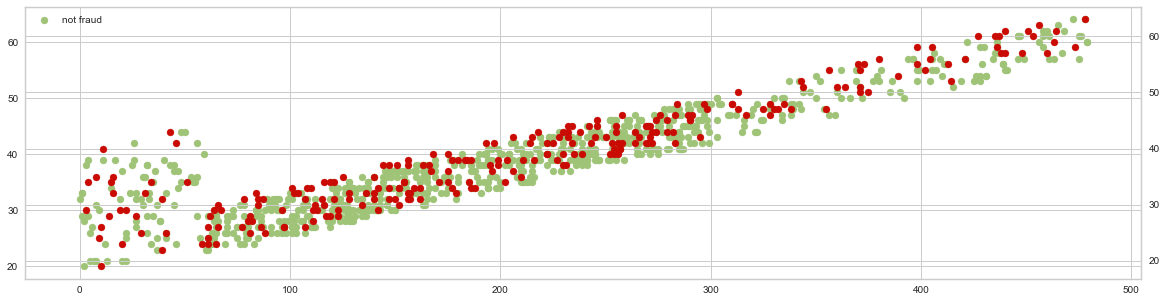

In [51]:
fig,axs=plt.subplots(1,1,figsize=(20,5))
ax2=axs.twinx()
fraud=df[df['fraud_reported']==1]
non_fraud=df[df['fraud_reported']==0]
p=ax2.scatter(fraud['months_as_customer'],fraud['age'],color ='r',label='fraud')
p=axs.scatter(non_fraud['months_as_customer'],non_fraud['age'],color ='g',label='not fraud')
p=axs.legend()


In [52]:
df['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

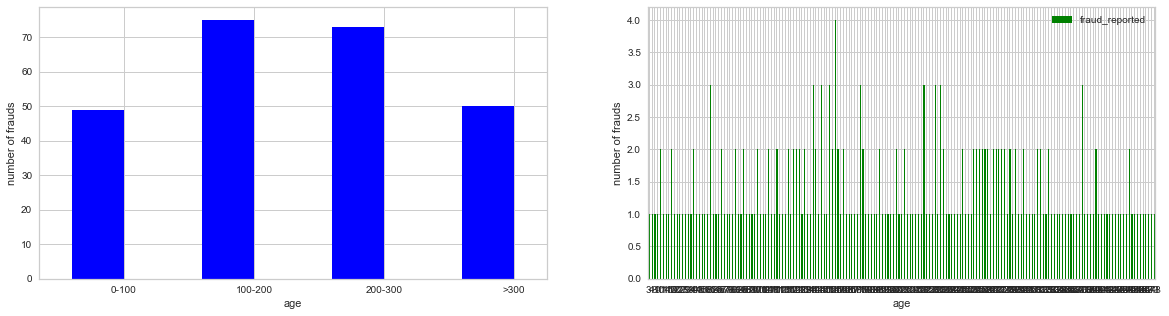

In [53]:
df1=df[df['fraud_reported']==1][['months_as_customer','fraud_reported']]
#creating buckets for senior patients
def a(val):
    if (val <=100) :
        return('0-100')
    elif (val<=200):
         return('100-200')
    elif (val<=300):
         return('200-300')
    else:
        return('>300')
df1['dist']=df['months_as_customer'].apply(lambda x :a(x))
fig,axs=plt.subplots(1,2,figsize=(20,5))



df2=df1.groupby('dist').agg({
    'fraud_reported':'count'
})
width=0.4
df2['fraud_reported'].plot(kind='bar',rot=0,ax=axs[0],color='blue',position=1,width=width)

df1.groupby(['months_as_customer']).agg({'fraud_reported':'count'}).plot(kind='bar',rot=0,ax=axs[1],color='green',position=0,width=width,label='revenue')

axs[0].set_ylabel('number of frauds')
axs[1].set_ylabel('number of frauds')

axs[0].set_xlabel('age')
axs[1].set_xlabel('age')


for ax in axs:
    ax.yaxis.grid(True)


#### Vehicle age & Fraud

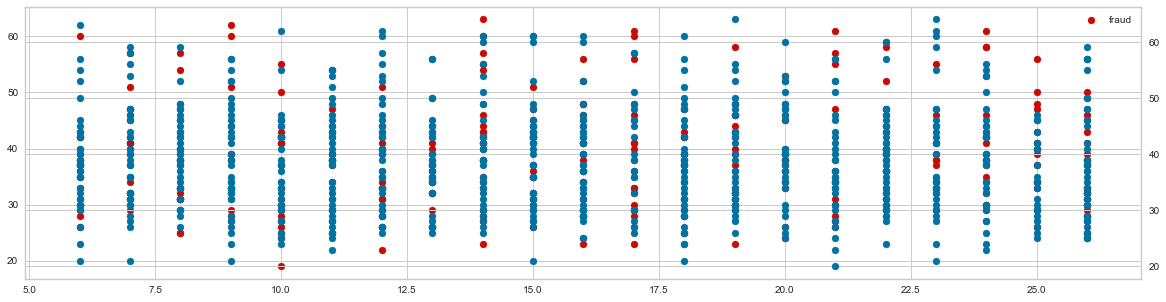

In [54]:
fig,axs=plt.subplots(1,1,figsize=(20,5))
ax2=axs.twinx()
fraud=df[df['fraud_reported']==1]
non_fraud=df[df['fraud_reported']==0]
p=axs.scatter(fraud['vehicle_age'],fraud['age'],color ='r',label='fraud')
p=ax2.scatter(non_fraud['vehicle_age'],non_fraud['age'],color ='b',label='not fraud')
p=axs.legend()


In [55]:
df['vehicle_age'].min()

6

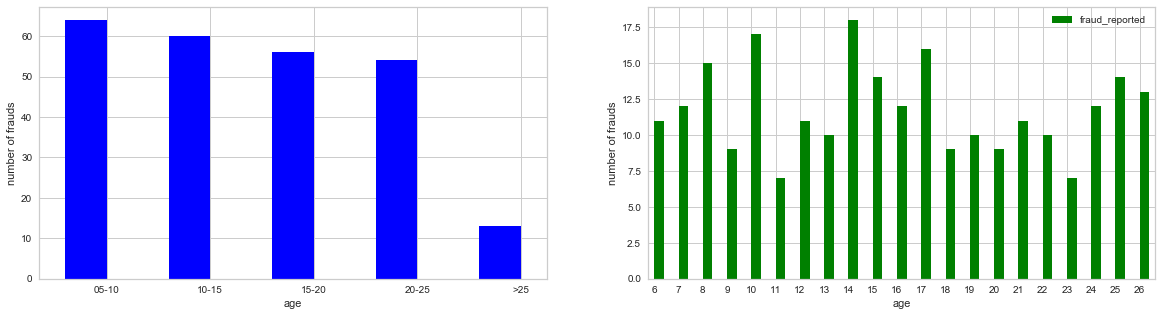

In [56]:
df1=df[df['fraud_reported']==1][['vehicle_age','fraud_reported']]
#creating buckets for senior patients
def a(val):
    if (val <=10) :
        return('05-10')
    elif (val<=15):
         return('10-15')
    elif (val<=20):
         return('15-20')
    elif (val<=25):
         return('20-25')
    else:
        return('>25')
df1['dist']=df['vehicle_age'].apply(lambda x :a(x))
fig,axs=plt.subplots(1,2,figsize=(20,5))



df2=df1.groupby('dist').agg({
    'fraud_reported':'count'
})
width=0.4
df2['fraud_reported'].plot(kind='bar',rot=0,ax=axs[0],color='blue',position=1,width=width)

df1.groupby(['vehicle_age']).agg({'fraud_reported':'count'}).plot(kind='bar',rot=0,ax=axs[1],color='green',position=0,width=width,label='revenue')

axs[0].set_ylabel('number of frauds')
axs[1].set_ylabel('number of frauds')

axs[0].set_xlabel('age')
axs[1].set_xlabel('age')


for ax in axs:
    ax.yaxis.grid(True)



#### policy premium


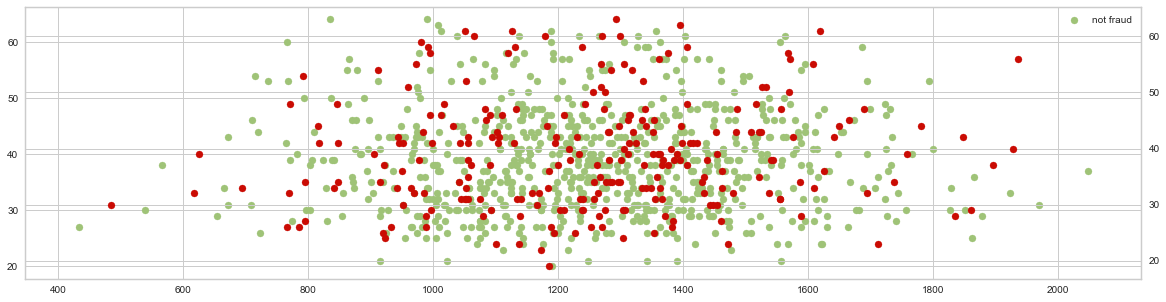

In [57]:
fig,axs=plt.subplots(1,1,figsize=(20,5))
ax2=axs.twinx()
fraud=df[df['fraud_reported']==1]
non_fraud=df[df['fraud_reported']==0]
p=ax2.scatter(fraud['policy_annual_premium'],fraud['age'],color ='r',label='fraud')
p=axs.scatter(non_fraud['policy_annual_premium'],non_fraud['age'],color ='g',label='not fraud')
p=axs.legend()


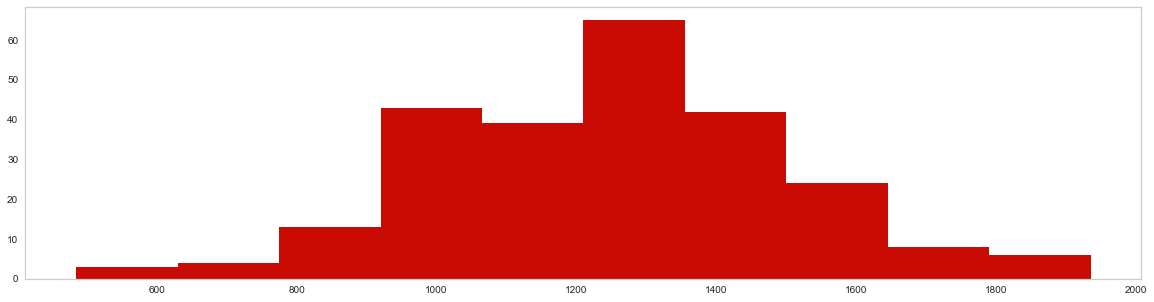

In [58]:
df[df['fraud_reported']==1]['policy_annual_premium'].hist(figsize=(20,5),grid=False,color='r')

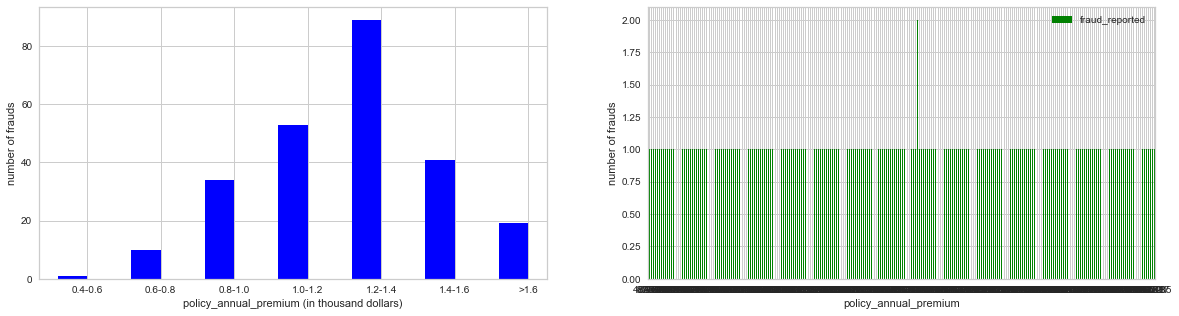

In [59]:
df1=df[df['fraud_reported']==1][['policy_annual_premium','fraud_reported']]
#creating buckets for senior patients
def a(val):
    if (val <=600) :
        return('0.4-0.6')
    elif (val<=800):
         return('0.6-0.8')
    elif (val<=1000):
         return('0.8-1.0')
    elif (val<=1200):
         return('1.0-1.2')
    elif (val<=1400):
         return('1.2-1.4')
    elif (val<=1600):
        return('1.4-1.6')
    else:
        return('>1.6')
df1['dist']=df['policy_annual_premium'].apply(lambda x :a(x))
fig,axs=plt.subplots(1,2,figsize=(20,5))



df2=df1.groupby('dist').agg({
    'fraud_reported':'count'
})
width=0.4
df2['fraud_reported'].plot(kind='bar',rot=0,ax=axs[0],color='blue',position=1,width=width)

df1.groupby(['policy_annual_premium']).agg({'fraud_reported':'count'}).plot(kind='bar',rot=0,ax=axs[1],color='green',position=0,width=width,label='revenue')

axs[0].set_ylabel('number of frauds')
axs[1].set_ylabel('number of frauds')

axs[0].set_xlabel('policy_annual_premium (in thousand dollars)')
axs[1].set_xlabel('policy_annual_premium')


for ax in axs:
    ax.yaxis.grid(True)



#### police report 

In [60]:
df[(df['fraud_reported']==1) & (df['police_report_available']==1)]

months_as_customer  age  policy_csl  policy_deductable  \
0                   328   48           0               1000   
14                  180   38           0               2000   
22                  370   55           1               2000   
25                    8   35           1               2000   
35                  147   33           1               1000   
..                  ...  ...         ...                ...   
927                 156   32           0                500   
935                 154   34           1               1000   
964                 163   37           2               1000   
972                 232   44           0               2000   
982                 230   43           2               2000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            0   
14                 1301.13               0            1   
22                  972.18               0            0   
25                 1266.92               0            0   
35                 1334.15         6000000            0   
..                     ...             ...          ...   
927                1479.48               0            0   
935                1041.36               0            1   
964                1200.33         4000000            1   
972                1181.64               0            0   
982                1101.83               0            0   

     insured_education_level  insured_occupation  insured_relationship  ...  \
0                          0                   0                     0  ...   
14                         5                   1                     5  ...   
22                         4                   5                     1  ...   
25                         3                   2                     2  ...   
35                         4                   0                     5  ...   
..                       ...                 ...                   ...  ...   
927                        3                   5                     3  ...   
935                        6                   7                     0  ...   
964                        4                   0                     2  ...   
972                        5                   6                     4  ...   
982                        4                   8                     1  ...   

     property_damage  bodily_injuries  witnesses  police_report_available  \
0                  1                1          2                        1   
14                 0                0          2                        1   
22                 0                0          0                        1   
25                 0                1          3                        1   
35                 1                2          0                        1   
..               ...              ...        ...                      ...   
927                1                1          3                        1   
935                0                2          3                        1   
964                0                2          1                        1   
972                0                1          1                        1   
982                0                0          3                        1   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
14                46200          4200            8400          33600   
22                71520         17880            5960          47680   
25                71500         16500           11000          44000   
35                53100         10620            5310          37170   
..                  ...           ...             ...            ...   
927               74690          6790           13580          54320   
935               74360         13520           13520          47320   
964              

In [61]:
t=df[['fraud_reported','police_report_available']].reset_index()
t=t.groupby(['fraud_reported','police_report_available']).agg({'count'}).rename(columns={'index':'customers'})
t

customers
                                           count
fraud_reported police_report_available          
0              0                             510
               1                             242
1              0                             175
               1                              72

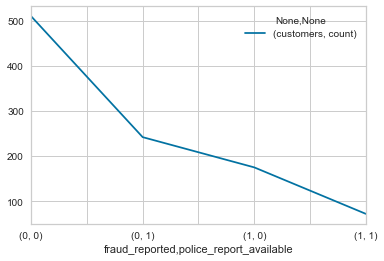

In [62]:
t.plot()

a fraudulent transaction has comparitively lower number of reported police cases

#### Capital gains

In [63]:
df['capital-gains'].unique()

array([ 53300,      0,  35100,  48900,  66000,  38400,  52800,  41300,
        55700,  63600,  53500,  45500,  57000,  46700,  72700,  31000,
        53200,  27500,  81100,  51400,  65700,  48500,  49700,  36400,
        35300,  88400,  47600,  71500,  36100,  56600,  94800,  36900,
        69100,  62400,  35700,  43400,  59600,  43300,  56200,  37800,
        78300,  52700,  57300,    800,  55200,  90700,  67700,  61500,
        37300,  50500,  34300,  28800,  52600,  34400,  62000,  41200,
        44300,  58000,  51100,  47200,  70500,  40700,  42400,  57900,
        60000,  65300,  84900,  45300,  68900,  46300,  76000,  58600,
        54100,  58100,  13100,  31900,  17600,  52000,  29000,  62500,
        39600,  47700,  38100,  71400,  75400,  88800,  53900,  27000,
        72200,  29600,  51000,  62700,  25000,  68500,  42900,  29300,
        45100,  63100,  66400,  25500,  59900,  62200,  24000,  24800,
        47800,  53000,  24400,  65600,  39900,  40600,  33300,  54000,
      

In [64]:
df1=df[df['capital-gains']==0]
t=df1[['fraud_reported','police_report_available']].reset_index()
t=t.groupby(['fraud_reported']).agg({'count'}).rename(columns={'index':'customers'})
t

customers police_report_available
                   count                   count
fraud_reported                                  
0                    378                     378
1                    129                     129

In [65]:
df1=df[df['capital-gains']!=0]
t=df1[['fraud_reported','police_report_available']].reset_index()
t=t.groupby(['fraud_reported']).agg({'count'}).rename(columns={'index':'customers'})
t

customers police_report_available
                   count                   count
fraud_reported                                  
0                    374                     374
1                    118                     118

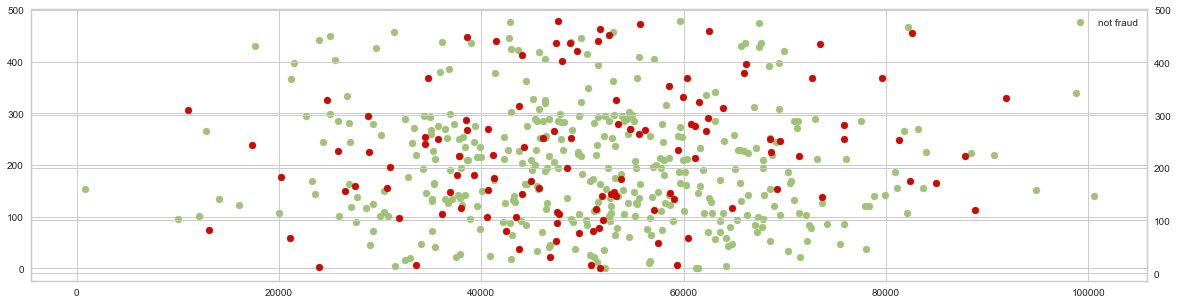

In [66]:
df1=df[df['capital-gains']!=0]

fig,axs=plt.subplots(1,1,figsize=(20,5))
ax2=axs.twinx()

fraud=df1[df1['fraud_reported']==1]
non_fraud=df1[df1['fraud_reported']==0]
p=ax2.scatter(fraud['capital-gains'],fraud['months_as_customer'],color ='r',label='fraud')
p=axs.scatter(non_fraud['capital-gains'],non_fraud['months_as_customer'],color ='g',label='not fraud')
p=axs.legend()

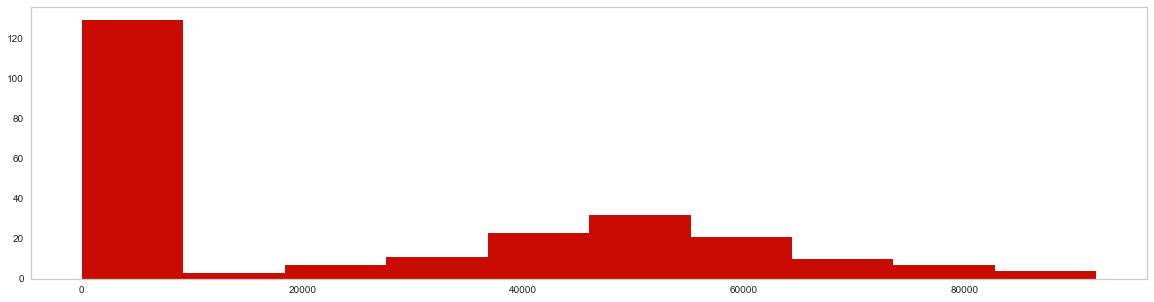

In [67]:
df[df['fraud_reported']==1]['capital-gains'].hist(figsize=(20,5),grid=False,color='r')

#### total_claim_amount

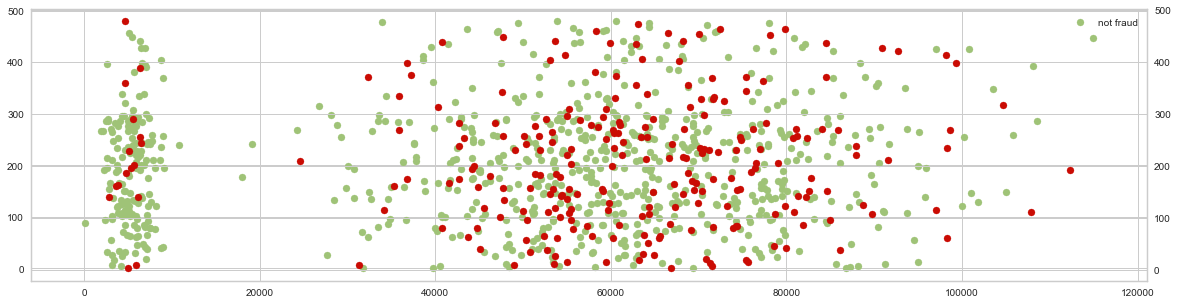

In [68]:

fig,axs=plt.subplots(1,1,figsize=(20,5))
ax2=axs.twinx()

fraud=df[df['fraud_reported']==1]
non_fraud=df[df['fraud_reported']==0]
p=ax2.scatter(fraud['total_claim_amount'],fraud['months_as_customer'],color ='r',label='fraud')
p=axs.scatter(non_fraud['total_claim_amount'],non_fraud['months_as_customer'],color ='g',label='not fraud')
p=axs.legend()

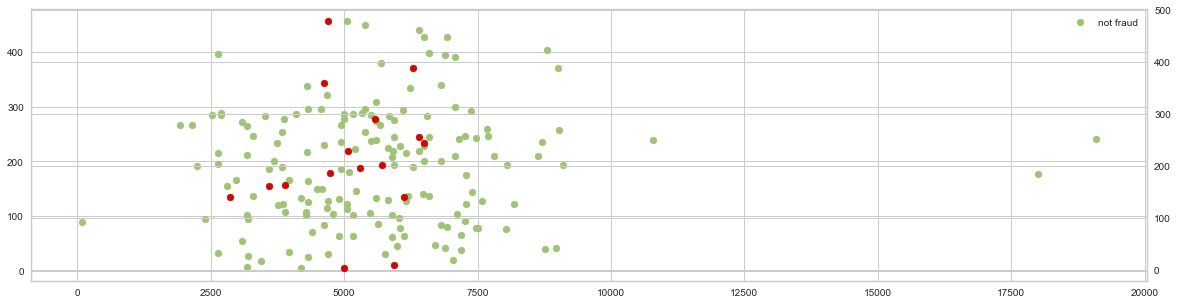

In [69]:
#lets look into the cluster on the left above
df1=df[df['total_claim_amount']<20000]

fig,axs=plt.subplots(1,1,figsize=(20,5))
ax2=axs.twinx()

fraud=df1[df1['fraud_reported']==1]
non_fraud=df1[df1['fraud_reported']==0]
p=ax2.scatter(fraud['total_claim_amount'],fraud['months_as_customer'],color ='r',label='fraud')
p=axs.scatter(non_fraud['total_claim_amount'],non_fraud['months_as_customer'],color ='g',label='not fraud')
p=axs.legend()

In [70]:
df1[['total_claim_amount','months_as_customer','age']].corr()

total_claim_amount  months_as_customer       age
total_claim_amount            1.000000            0.074672  0.043619
months_as_customer            0.074672            1.000000  0.909838
age                           0.043619            0.909838  1.000000

### Correlation matrix and its heat map
- <b>A correlation matrix </b>is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [71]:
df.corr()

months_as_customer       age  policy_csl  \
months_as_customer                     1.000000  0.922141   -0.008922   
age                                    0.922141  1.000000   -0.009898   
policy_csl                            -0.008922 -0.009898    1.000000   
policy_deductable                      0.027553  0.029553    0.003999   
policy_annual_premium                  0.004785  0.014293   -0.003835   
umbrella_limit                         0.016146  0.018441   -0.015551   
insured_sex                           -0.060225 -0.073024    0.070810   
insured_education_level               -0.074500 -0.075854   -0.041979   
insured_occupation                     0.005160  0.007271    0.020716   
insured_relationship                   0.033264  0.057068    0.002288   
capital-gains                          0.007032 -0.006777   -0.001578   
capital-loss                           0.019559  0.007052   -0.008127   
incident_type                         -0.013601 -0.006696   -0.004167   
collision_type                         0.073808  0.076164   -0.017205   
incident_severity                     -0.058764 -0.058066   -0.003382   
authorities_contacted                 -0.013665 -0.014354   -0.010348   
incident_hour_of_the_day               0.070522  0.087103   -0.005224   
number_of_vehicles_involved            0.015319  0.022386   -0.005085   
property_damage                        0.004435 -0.003921   -0.009840   
bodily_injuries                       -0.009328 -0.015286    0.016136   
witnesses                              0.058708  0.052513    0.012145   
police_report_available               -0.021685 -0.020221   -0.056124   
total_claim_amount                     0.061106  0.069427    0.011923   
injury_claim                           0.065185  0.075451   -0.007760   
property_claim                         0.033613  0.060350    0.013788   
vehicle_claim                          0.059979  0.062131    0.015157   
fraud_reported                         0.020951  0.012338   -0.041446   
vehicle_age                           -0.000763 -0.001862    0.033763   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.027553               0.004785   
age                                   0.029553               0.014293   
policy_csl                            0.003999              -0.003835   
policy_deductable                     1.000000              -0.002897   
policy_annual_premium                -0.002897               1.000000   
umbrella_limit                        0.009927              -0.005941   
insured_sex                           0.008622              -0.038515   
insured_education_level              -0.064630              -0.008194   
insured_occupation                    0.021041               0.036355   
insured_relationship                 -0.009993              -0.006433   
capital-gains                         0.034305              -0.013441   
capital-loss                         -0.022574               0.023237   
incident_type                         0.034312              -0.066049   
collision_type                        0.052589              -0.036138   
incident_severity                    -0.017046              -0.010740   
authorities_contacted                -0.006698               0.040096   
incident_hour_of_the_day              0.061173              -0.001644   
number_of_vehicles_involved           0.050401              -0.045732   
property_damage                       0.017382               0.080323   
bodily_injuries                      -0.024055               0.027209   
witnesses                             0.066224               0.002480   
police_report_available               0.037361               0.022232   
total_claim_amount                    0.024516               0.008576   
injury_claim                          0.039370              -0.017712   
property_claim                        0.067063              -0.012359   
vehicle_claim

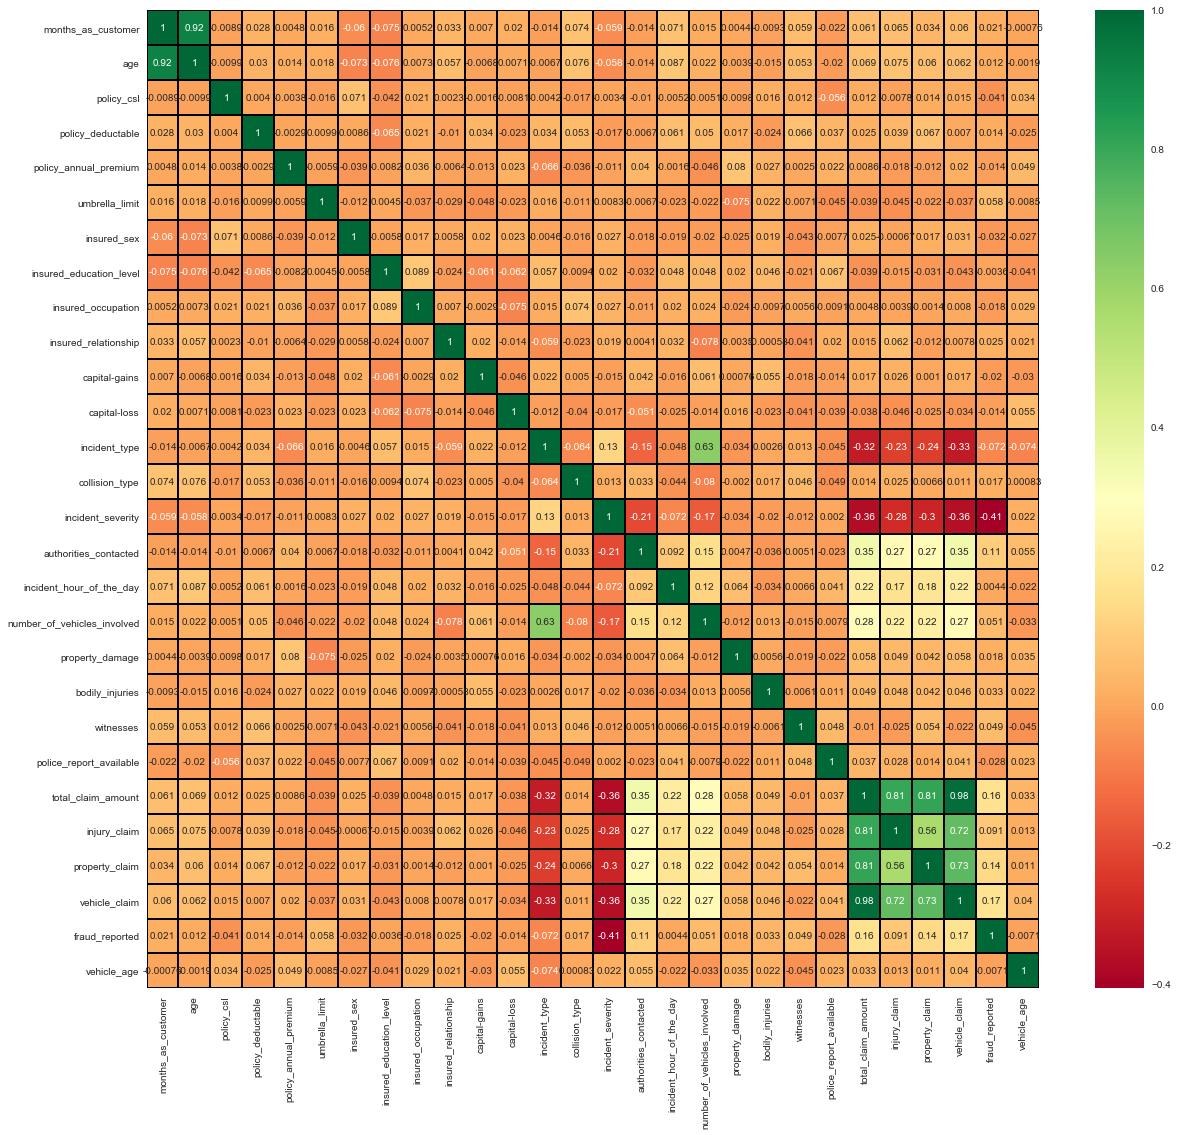

In [72]:
plt.figure(figsize=(20,18))
#matrix = np.triu(df_main.corr())
p=sns.heatmap(df.corr(), annot=True,cmap= 'RdYlGn',linewidths=1, linecolor='black')

<b> Insights </b>
- From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.
- total claim amount is further divided into vehicle, property & injury claim hence shows  high correlation . So, we'll drop the total claim column.


In [73]:
df.drop(columns=['age','total_claim_amount'],inplace=True)

In [74]:
df

months_as_customer  policy_csl  policy_deductable  policy_annual_premium  \
0                   328           0               1000                1406.91   
1                   228           0               2000                1197.22   
2                   134           1               2000                1413.14   
3                   256           0               2000                1415.74   
4                   228           2               1000                1583.91   
..                  ...         ...                ...                    ...   
995                   3           2               1000                1310.80   
996                 285           1               1000                1436.79   
997                 130           0                500                1383.49   
998                 458           2               2000                1356.92   
999                 456           0               1000                 766.19   

     umbrella_limit  insured_sex  insured_education_level  insured_occupation  \
0                 0            0                        0                   0   
1           5000000            0                        0                   1   
2           5000000            1                        1                   2   
3           6000000            1                        1                   3   
4           6000000            0                        2                   2   
..              ...          ...                      ...                 ...   
995               0            1                        3                   0   
996               0            1                        1                   5   
997         3000000            1                        3                   3   
998         5000000            0                        2                  11   
999               0            1                        2                   2   

     insured_relationship  capital-gains  ...  number_of_vehicles_involved  \
0                       0          53300  ...                            1   
1                       1              0  ...                            1   
2                       2          35100  ...                            3   
3                       3          48900  ...                            1   
4                       3          66000  ...                            1   
..                    ...            ...  ...                          ...   
995                     3              0  ...                            1   
996                     4          70900  ...                            1   
997                     1          35100  ...                            3   
998                     4              0  ...                            1   
999                     0              0  ...                            1   

     property_damage  bodily_injuries  witnesses  police_report_available  \
0                  1                1          2                        1   
1                  0                0          0                        0   
2                  0                2          3                        0   
3                  0                1          2                        0   
4                  0                0          1                        0   
..               ...              ...        ...                      ...   
995                1                0          1                        0   
996                1                2          3                        0   
997                0                2          3                        1   
998                0                0          1                        1   
999                0                0          3                        0   

     injury_claim  property_claim  vehicle_claim  fraud_reported  vehicle_age  
0            6510           13020          52080               1           17  
1             780             780    

## Collinearity
- what is collinearity?
 >.
 - Collinearity can be defined simply as a high level of correlation between two variables. (When more than two variables are involved, this would be called as multicollinearity.) 
- why is it a problem?
 >. 
 - Collinearity is a problem in key driver analysis because, when two independent variables are highly correlated, it becomes difficult to accurately partial out their individual impact on the dependent variable. This often results in beta coefficients that don't appear to be reasonable
 >. 
 - When variables used in clustering are collinear, some variables get a higher weight than others. If two variables are perfectly correlated, they effectively represent the same concept. But that concept is now represented twice in the data and hence gets twice the weight of all the other variables. The final solution is likely to be skewed in the direction of that concept, which could be a problem if it’s not anticipated. 
- Example
>. 
 - For example, while the intention may have been to conduct a cluster analysis on 20 variables, it may actually be conducted on seven concepts that may be unequally weighted. In this situation, there could be a large gap between the intention of the analyst (clustering 20 variables) and what happens in reality (segments based on seven concepts). This could cause the segmentation analysis to go in an undesirable direction.

### VIF
A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a  model.
>. <i>Note :</i>A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

>. Explanation of Decision of threshold value and formulas can be found <a href="https://quantifyinghealth.com/vif-threshold/" ><i>here</i></a>

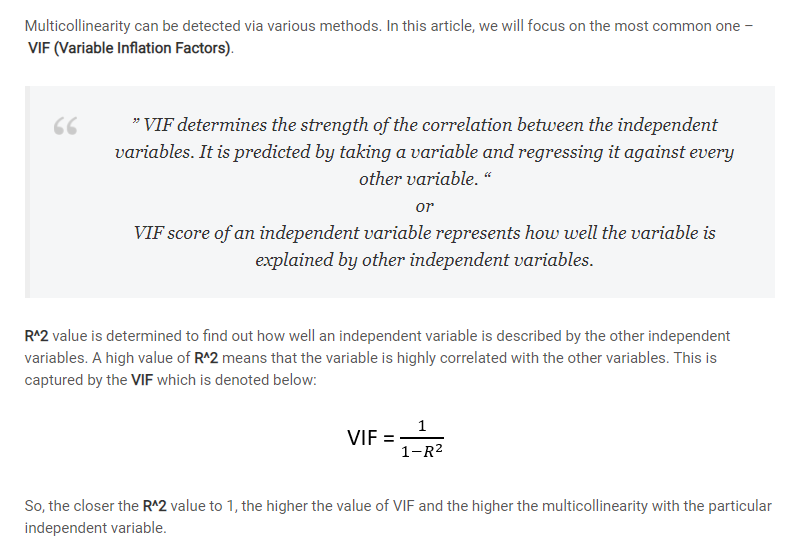

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [76]:
df_temp = df.copy()

In [77]:
calc_vif(df_temp)

variables        VIF
0            months_as_customer   4.123649
1                    policy_csl   2.382766
2             policy_deductable   4.444550
3         policy_annual_premium  17.544609
4                umbrella_limit   1.250923
5                   insured_sex   2.157741
6       insured_education_level   3.333873
7            insured_occupation   3.436128
8          insured_relationship   3.013635
9                 capital-gains   1.833603
10                 capital-loss   1.960044
11                incident_type   6.993719
12               collision_type   2.842382
13            incident_severity   3.342141
14        authorities_contacted   3.140193
15     incident_hour_of_the_day   4.051453
16  number_of_vehicles_involved  13.445558
17              property_damage   1.467861
18              bodily_injuries   2.496523
19                    witnesses   2.828961
20      police_report_available   1.499302
21                 injury_claim   7.188801
22               property_claim   7.451435
23                vehicle_claim  20.103407
24               fraud_reported   1.598489
25                  vehicle_age   7.476876

In [78]:
df_temp.drop(columns=['number_of_vehicles_involved'],inplace=True)
calc_vif(df_temp)

variables        VIF
0         months_as_customer   4.123374
1                 policy_csl   2.382545
2          policy_deductable   4.440411
3      policy_annual_premium  17.541711
4             umbrella_limit   1.250115
5                insured_sex   2.152366
6    insured_education_level   3.326942
7         insured_occupation   3.434586
8       insured_relationship   3.000422
9              capital-gains   1.827083
10              capital-loss   1.958022
11             incident_type   2.397304
12            collision_type   2.831116
13         incident_severity   3.278852
14     authorities_contacted   3.075332
15  incident_hour_of_the_day   4.030039
16           property_damage   1.465890
17           bodily_injuries   2.495935
18                 witnesses   2.825999
19   police_report_available   1.499082
20              injury_claim   7.174106
21            property_claim   7.443022
22             vehicle_claim  17.296182
23            fraud_reported   1.597902
24               vehicle_age   7.475490

In [79]:
df_temp.drop(columns=['policy_annual_premium'],inplace=True)
calc_vif(df_temp)

variables        VIF
0         months_as_customer   4.017068
1                 policy_csl   2.358299
2          policy_deductable   4.329755
3             umbrella_limit   1.245228
4                insured_sex   2.140171
5    insured_education_level   3.247384
6         insured_occupation   3.377847
7       insured_relationship   2.953999
8              capital-gains   1.817285
9               capital-loss   1.956726
10             incident_type   2.352049
11            collision_type   2.817237
12         incident_severity   3.135798
13     authorities_contacted   3.036331
14  incident_hour_of_the_day   3.999237
15           property_damage   1.446743
16           bodily_injuries   2.462680
17                 witnesses   2.780416
18   police_report_available   1.493017
19              injury_claim   7.162789
20            property_claim   7.437694
21             vehicle_claim  16.860306
22            fraud_reported   1.588864
23               vehicle_age   6.859860

In [82]:
final_list_columns=calculate_vif_(df,8) #function 1.7.3

26
 dropping 'vehicle_claim' at index: 23
25


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  23 | elapsed: 

 dropping 'policy_annual_premium' at index: 3
24
 dropping 'number_of_vehicles_involved' at index: 15
23
Remaining variables:
[['months_as_customer', 'policy_csl', 'policy_deductable', 'umbrella_limit', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_hour_of_the_day', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'injury_claim', 'property_claim', 'fraud_reported', 'vehicle_age']]


[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.0s finished


In [83]:
final_list_columns

['months_as_customer',
 'policy_csl',
 'policy_deductable',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_hour_of_the_day',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'injury_claim',
 'property_claim',
 'fraud_reported',
 'vehicle_age']

<b>Insights </b>
- policy annual premium & no of vehicles involved & vehicle age  shows a high VIF ,dropping all

In [84]:
df=df[final_list_columns]

In [85]:
df.head()

months_as_customer  policy_csl  policy_deductable  umbrella_limit  \
0                 328           0               1000               0   
1                 228           0               2000         5000000   
2                 134           1               2000         5000000   
3                 256           0               2000         6000000   
4                 228           2               1000         6000000   

   insured_sex  insured_education_level  insured_occupation  \
0            0                        0                   0   
1            0                        0                   1   
2            1                        1                   2   
3            1                        1                   3   
4            0                        2                   2   

   insured_relationship  capital-gains  capital-loss  ...  \
0                     0          53300             0  ...   
1                     1              0             0  ...   
2                     2          35100             0  ...   
3                     3          48900        -62400  ...   
4                     3          66000        -46000  ...   

   authorities_contacted  incident_hour_of_the_day  property_damage  \
0                      0                         5                1   
1                      0                         8                0   
2                      0                         7                0   
3                      0                         5                0   
4                      1                        20                0   

   bodily_injuries  witnesses  police_report_available  injury_claim  \
0                1          2                        1          6510   
1                0          0                        0           780   
2                2          3                        0          7700   
3                1          2                        0          6340   
4                0          1                        0          1300   

   property_claim  fraud_reported  vehicle_age  
0           13020               1           17  
1             780               1           14  
2            3850               0           14  
3            6340               1            7  
4             650               0           12  

[5 rows x 23 columns]

## Data Prep 

#### One Hot encoding categorical columns

In [86]:
df[categorical_columns]

policy_csl  insured_education_level  incident_severity  insured_sex  \
0             0                        0                  0            0   
1             0                        0                  1            0   
2             1                        1                  1            1   
3             0                        1                  0            1   
4             2                        2                  1            0   
..          ...                      ...                ...          ...   
995           2                        3                  1            1   
996           1                        1                  0            1   
997           0                        3                  1            1   
998           2                        2                  0            0   
999           0                        2                  1            1   

     property_damage  police_report_available  incident_type  collision_type  \
0                  1                        1              0               0   
1                  0                        0              1               1   
2                  0                        0              2               1   
3                  0                        0              0               2   
4                  0                        0              1               1   
..               ...                      ...            ...             ...   
995                1                        0              0               2   
996                1                        0              0               1   
997                0                        1              2               0   
998                0                        1              0               1   
999                0                        0              3               1   

     authorities_contacted  insured_occupation  insured_relationship  \
0                        0                   0                     0   
1                        0                   1                     1   
2                        0                   2                     2   
3                        0                   3                     3   
4                        1                   2                     3   
..                     ...                 ...                   ...   
995                      2                   0                     3   
996                      2                   5                     4   
997                      0                   3                     1   
998                      3                  11                     4   
999                      0                   2                     0   

     fraud_reported  
0                 1  
1                 1  
2                 0  
3                 1  
4                 0  
..              ...  
995               0  
996               0  
997               0  
998               0  
999               0  

[999 rows x 12 columns]

In [87]:
df_cat=df[categorical_columns].copy()
for col in categorical_columns:
    df_cat=pd.get_dummies(df_cat, columns=[col], prefix = [col], drop_first=True)
    #drop_first=True to avoid dummy variable trap

In [88]:
df_cat.head()

policy_csl_1  policy_csl_2  insured_education_level_1  \
0             0             0                          0   
1             0             0                          0   
2             1             0                          1   
3             0             0                          1   
4             0             1                          0   

   insured_education_level_2  insured_education_level_3  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          1                          0   

   insured_education_level_4  insured_education_level_5  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   insured_education_level_6  incident_severity_1  incident_severity_2  ...  \
0                          0                    0                    0  ...   
1                          0                    1                    0  ...   
2                          0                    1                    0  ...   
3                          0                    0                    0  ...   
4                          0                    1                    0  ...   

   insured_occupation_10  insured_occupation_11  insured_occupation_12  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   insured_occupation_13  insured_relationship_1  insured_relationship_2  \
0                      0                       0                       0   
1                      0                       1                       0   
2                      0                       0                       1   
3                      0                       0                       0   
4                      0                       0                       0   

   insured_relationship_3  insured_relationship_4  insured_relationship_5  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       1                       0                       0   
4                       1                       0                       0   

   fraud_reported_1  
0                 1  
1                 1  
2                 0  
3                 1  
4                 0  

[5 rows x 42 columns]

In [89]:
df_cat.columns

Index(['policy_csl_1', 'policy_csl_2', 'insured_education_level_1',
       'insured_education_level_2', 'insured_education_level_3',
       'insured_education_level_4', 'insured_education_level_5',
       'insured_education_level_6', 'incident_severity_1',
       'incident_severity_2', 'incident_severity_3', 'insured_sex_1',
       'property_damage_1', 'police_report_available_1', 'incident_type_1',
       'incident_type_2', 'incident_type_3', 'collision_type_1',
       'collision_type_2', 'authorities_contacted_1',
       'authorities_contacted_2', 'authorities_contacted_3',
       'authorities_contacted_4', 'insured_occupation_1',
       'insured_occupation_2', 'insured_occupation_3', 'insured_occupation_4',
       'insured_occupation_5', 'insured_occupation_6', 'insured_occupation_7',
       'insured_occupation_8', 'insured_occupation_9', 'insured_occupation_10',
       'insured_occupation_11', 'insured_occupation_12',
       'insured_occupation_13', 'insured_relationship_1',
      

#### Scaling numerical columns

In [90]:
numerical_col_list = list(np.setdiff1d(list(df.columns), categorical_columns))

In [91]:
numerical_col_list,len(numerical_col_list)

(['bodily_injuries',
  'capital-gains',
  'capital-loss',
  'incident_hour_of_the_day',
  'injury_claim',
  'months_as_customer',
  'policy_deductable',
  'property_claim',
  'umbrella_limit',
  'vehicle_age',
  'witnesses'],
 11)

In [92]:
df_num=df[numerical_col_list]

In [93]:
def normalize_df(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df_scaled = min_max_scaler.fit_transform(df)
    Scaled_df=pd.DataFrame(df_scaled,columns=df.columns.tolist(),index=df.index)
    return Scaled_df,min_max_scaler

In [94]:
df_num,min_max_scaler=normalize_df(df_num) #this scaler will be save in application 

In [95]:
df_num.head()

bodily_injuries  capital-gains  capital-loss  incident_hour_of_the_day  \
0              0.5       0.530348      1.000000                  0.217391   
1              0.0       0.000000      1.000000                  0.347826   
2              1.0       0.349254      1.000000                  0.304348   
3              0.5       0.486567      0.438344                  0.217391   
4              0.0       0.656716      0.585959                  0.869565   

   injury_claim  months_as_customer  policy_deductable  property_claim  \
0      0.303497            0.684760           0.333333        0.550063   
1      0.036364            0.475992           1.000000        0.032953   
2      0.358974            0.279749           1.000000        0.162653   
3      0.295571            0.534447           1.000000        0.267850   
4      0.060606            0.475992           0.333333        0.027461   

   umbrella_limit  vehicle_age  witnesses  
0             0.0         0.55   0.666667  
1             0.5         0.40   0.000000  
2             0.5         0.40   1.000000  
3             0.6         0.05   0.666667  
4             0.6         0.30   0.333333

#### Final Data for modeling

In [96]:
df=pd.concat([df_num,df_cat],axis=1) #(42+11=53 columns)

In [97]:
df

bodily_injuries  capital-gains  capital-loss  incident_hour_of_the_day  \
0                0.5       0.530348      1.000000                  0.217391   
1                0.0       0.000000      1.000000                  0.347826   
2                1.0       0.349254      1.000000                  0.304348   
3                0.5       0.486567      0.438344                  0.217391   
4                0.0       0.656716      0.585959                  0.869565   
..               ...            ...           ...                       ...   
995              0.0       0.000000      1.000000                  0.869565   
996              1.0       0.705473      1.000000                  1.000000   
997              1.0       0.349254      1.000000                  0.173913   
998              0.0       0.000000      1.000000                  0.086957   
999              0.0       0.000000      1.000000                  0.260870   

     injury_claim  months_as_customer  policy_deductable  property_claim  \
0        0.303497            0.684760           0.333333        0.550063   
1        0.036364            0.475992           1.000000        0.032953   
2        0.358974            0.279749           1.000000        0.162653   
3        0.295571            0.534447           1.000000        0.267850   
4        0.060606            0.475992           0.333333        0.027461   
..            ...                 ...                ...             ...   
995      0.813054            0.006263           0.333333        0.368399   
996      0.842890            0.594990           0.333333        0.763836   
997      0.349650            0.271399           0.000000        0.316857   
998      0.243357            0.956159           1.000000        0.220532   
999      0.021445            0.951983           0.333333        0.038868   

     umbrella_limit  vehicle_age  ...  insured_occupation_10  \
0               0.0         0.55  ...                      0   
1               0.5         0.40  ...                      0   
2               0.5         0.40  ...                      0   
3               0.6         0.05  ...                      0   
4               0.6         0.30  ...                      0   
..              ...          ...  ...                    ...   
995             0.0         0.45  ...                      0   
996             0.0         0.00  ...                      0   
997             0.3         0.95  ...                      0   
998             0.5         0.85  ...                      0   
999             0.0         0.40  ...                      0   

     insured_occupation_11  insured_occupation_12  insured_occupation_13  \
0                        0                      0                      0   
1                        0                      0                      0   
2                        0                      0                      0   
3                        0                      0                      0   
4                        0                      0                      0   
..                     ...                    ...                    ...   
995                      0                      0                      0   
996                      0                      0                      0   
997                      0                      0                      0   
998                      1                      0                      0   
999                      0                      0                      0   

     insured_relationship_1  insured_relationship_2  insured_relationship_3  \
0                         0                       0                       0   
1                         1                       0                       0   
2                         0                       1                       0   
3                         0                       0                       1   
4                         0                       0               

## Model

In [98]:
features =df.drop(columns=['fraud_reported_1'],axis=1)
label= df['fraud_reported_1']

In [99]:
import sklearn
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(features,label,test_size=1 / 3,random_state=0)                                                                                                                                                                                     

### XGBOOST

In [100]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(objective='binary:logistic', use_label_encoder=False)
params_grid = {

                'learning_rate': [0.5, 0.1, 0.01, 0.001,0.0005],
                'max_depth':  range(8, 10, 1),
                'n_estimators': [10, 50, 100, 200]


            }
       
grid_cv = GridSearchCV(estimator, param_grid=params_grid, cv=5, return_train_score=False)
grid_cv.fit(x_train, y_train)
best_estimator = grid_cv.best_estimator_

In [101]:
y_pred=best_estimator.predict(x_test)
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.6898307515777395

In [102]:
pd.DataFrame(grid_cv.cv_results_)[['param_learning_rate','mean_test_score']].groupby(['param_learning_rate']).agg({'mean_test_score':'mean'})

mean_test_score
param_learning_rate                 
0.0005                      0.781868
0.0010                      0.781303
0.0100                      0.783745
0.1000                      0.773094
0.5000                      0.763147

### Random forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()

params_grid = {"n_estimators": [10, 50, 100, 130],
                       "criterion": ['gini', 'entropy'],
                        "max_depth": range(2, 4, 1),
                       "max_features": ['auto', 'log2']
                       }

        
grid_cv = GridSearchCV(estimator, param_grid=params_grid, cv=5, return_train_score=False)
grid_cv.fit(x_train, y_train)
best_estimator = grid_cv.best_estimator_

In [104]:
y_pred=best_estimator.predict(x_test)
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.5

### Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB
estimator = GaussianNB()
params_grid = {
            'var_smoothing': [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]

        }
grid_cv = GridSearchCV(estimator, param_grid=params_grid, cv=5, return_train_score=False)
grid_cv.fit(x_train, y_train)
best_estimator = grid_cv.best_estimator_

In [106]:
y_pred=best_estimator.predict(x_test)
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.6729059093516925

### SVM

In [107]:
from sklearn.svm import SVC

estimator = SVC(gamma='auto')
params_grid={
           'C': [0.1, 0.5, 1, 10,20],
            'kernel': ['linear','rbf', 'sigmoid']

        }
grid_cv = GridSearchCV(estimator, param_grid=params_grid, cv=5 ,return_train_score=False)
grid_cv.fit(x_train, y_train)

            #fetch the best estimator
best_estimator=grid_cv.best_estimator_

In [108]:
y_pred=best_estimator.predict(x_test)
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.717512908777969

In [109]:
from sklearn.linear_model import LogisticRegression

### Grid Search

In [110]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [111]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model name' :model_name,
        'model': clf.best_estimator_,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'ROC_AUC' : sklearn.metrics.roc_auc_score(y_test,clf.best_estimator_.predict(x_test))
    })
    
df1 = pd.DataFrame(scores,columns=['model name','model','best_score','best_params','ROC_AUC'])
df1

model name                                              model  \
0                  svm  SVC(C=10, break_ties=False, cache_size=200, cl...   
1        random_forest  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...   
2  logistic_regression  LogisticRegression(C=10, class_weight=None, du...   

   best_score                    best_params   ROC_AUC  
0    0.818292  {'C': 10, 'kernel': 'linear'}  0.717513  
1    0.762799           {'n_estimators': 10}  0.555149  
2    0.795758                      {'C': 10}  0.648164

### Comparing all Classification Models & Hyper Parameter Tuning

In [112]:
from pycaret.utils import version
version()

'2.2.3'

In [113]:
df.columns

Index(['bodily_injuries', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'injury_claim', 'months_as_customer',
       'policy_deductable', 'property_claim', 'umbrella_limit', 'vehicle_age',
       'witnesses', 'policy_csl_1', 'policy_csl_2',
       'insured_education_level_1', 'insured_education_level_2',
       'insured_education_level_3', 'insured_education_level_4',
       'insured_education_level_5', 'insured_education_level_6',
       'incident_severity_1', 'incident_severity_2', 'incident_severity_3',
       'insured_sex_1', 'property_damage_1', 'police_report_available_1',
       'incident_type_1', 'incident_type_2', 'incident_type_3',
       'collision_type_1', 'collision_type_2', 'authorities_contacted_1',
       'authorities_contacted_2', 'authorities_contacted_3',
       'authorities_contacted_4', 'insured_occupation_1',
       'insured_occupation_2', 'insured_occupation_3', 'insured_occupation_4',
       'insured_occupation_5', 'insured_occupation_6', '

In [114]:
import pycaret
from pycaret.classification import *
clf1 = setup(df, target = 'fraud_reported_1', session_id=786)

In [115]:
compare_models()

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [116]:
dt=create_model('dt')

In [117]:
bagged_dt = ensemble_model(dt, n_estimators = 100)

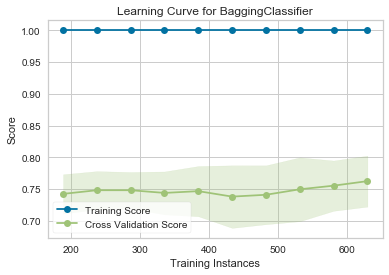

In [118]:
plot_model(estimator = bagged_dt, plot = 'learning')

In [119]:
svm=create_model('svm')
custom_params={
           'class_weight': [10,20],
            'kernel': ['linear','rbf', 'sigmoid']

        }
tune_model(estimator =svm,  fold = 5,  round = 4,  n_iter = 10, custom_grid = None,  optimize = 'Accuracy', choose_better = False, verbose = True)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.6100000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=786, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

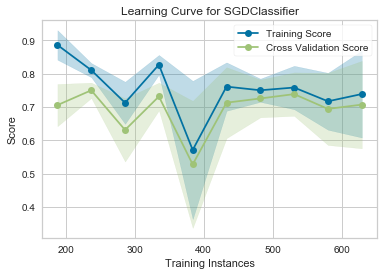

In [120]:
plot_model(estimator = svm, plot = 'learning')

In [121]:
automl(optimize = 'Accuracy')

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [122]:
# top5 = compare_models(n_select = 5) 
# # tune top 5 base models
# tuned_top5 = [tune_model(i) for i in top5]
# # ensemble top 5 tuned models
# bagged_top5 = [ensemble_model(i) for i in tuned_top5]
# # blend top 5 base models 
# blender = blend_models(estimator_list = top5) 
# # select best model 
# best = automl(optimize = 'Precision')

## Clustering - Intrinsic Clusters in DATA? (Cluster--->Model)
- Refer Scikit learn library for clustering <a href="https://scikit-learn.org/stable/modules/clustering.html#clustering" >here.</a>

### Determining The Optimal Number Of Clusters: 

- Determining the optimal number of clusters in a data set is a fundamental issue in partitioning clustering, such as k-means clustering, which requires the user to specify the number of clusters k to be generated.Unfortunately, there is no definitive answer to this question. The optimal number of clusters is somehow subjective and depends on the method used for measuring similarities and the parameters used for partitioning.

>. These methods include direct methods and statistical testing methods:
-  Direct methods: consists of optimizing a criterion, such as the within cluster sums of squares or the average silhouette. The corresponding methods are named elbow and silhouette methods, respectively.
-   Statistical testing methods: consists of comparing evidence against null hypothesis. An example is the gap statistic

#### Elbow method

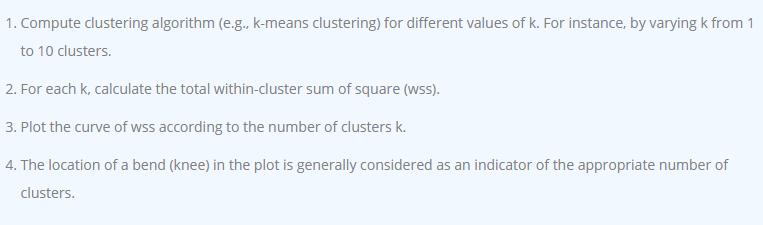

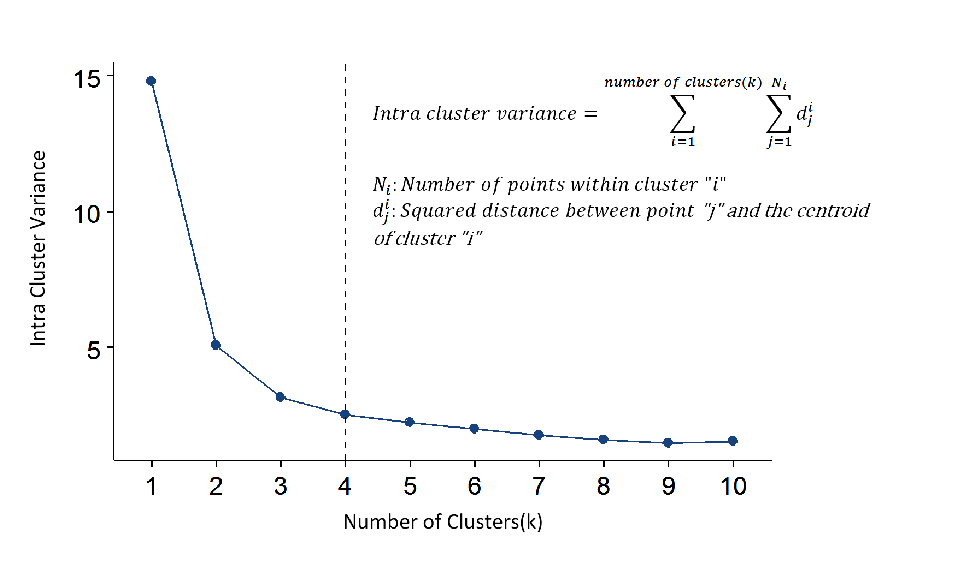


And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 7 clusters mark. 

Text(0, 0.5, 'WCSS')

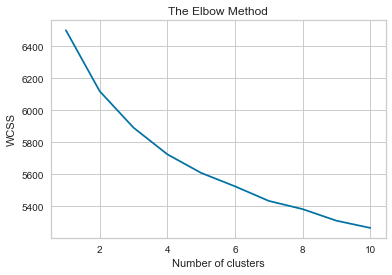

In [125]:
wcss = []
cluster_range = range(1, 11)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
            # generate the plot
plt.plot(cluster_range, wcss)  # creating the graph between WCSS and the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### Average silhouette method

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].
Where 1 means that points are very close to their own cluster and far from other clusters, whereas -1 indicates that points are close to the neighboring clusters.

The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.
The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

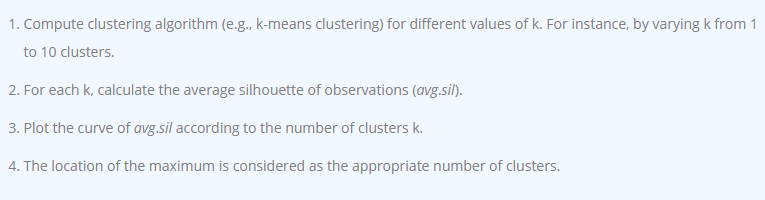

<a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html" >refer SKLearn for code </a>

For n_clusters = 2 The average silhouette_score is : 0.05682421439730767
For n_clusters = 3 The average silhouette_score is : 0.05323941507551916
For n_clusters = 4 The average silhouette_score is : 0.058464542125406076
For n_clusters = 5 The average silhouette_score is : 0.046242995092064594
For n_clusters = 6 The average silhouette_score is : 0.04785063537470404
For n_clusters = 7 The average silhouette_score is : 0.04776374155396374


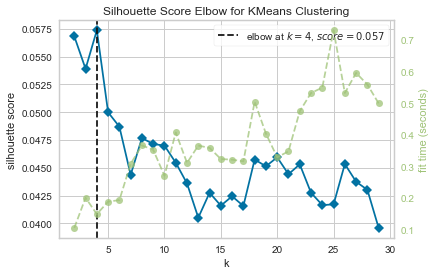

In [129]:
range_n_clusters = [2, 3, 4, 5, 6,7]
avg_silhouette(df,range_n_clusters)

#### Gap statistic method
- Gap Statistic is a method from researchers  Tibshirani, Walther, Hastie to determine the inherent number of clusters in a dataset with k-means clustering.
- API : <a href="https://libraries.io/pypi/gap-stat">here</a>
- Paper :<a href="https://statweb.stanford.edu/~gwalther/gap">here </a>

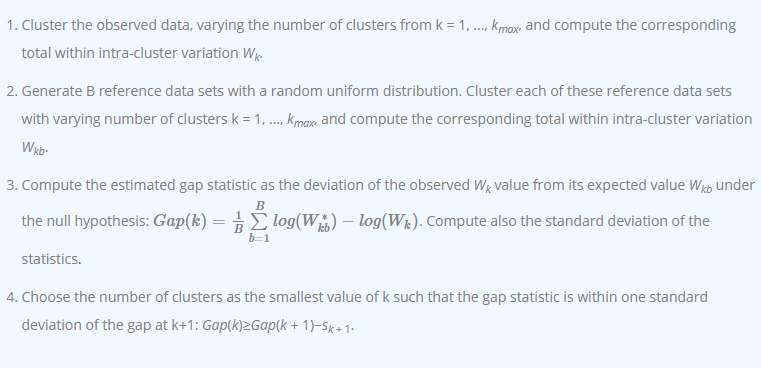

Optimal clusters:  4


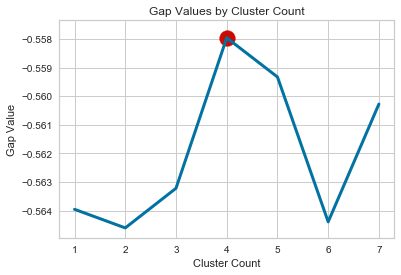

In [138]:
gap_statistics(df)    

### Clustering algorithms

#### K-means

In [139]:
#KMeans++ removes the drawback of K means which is it is dependent on initialization of centroid
kmodel=KMeans(init='k-means++', n_clusters=2, n_init=10,max_iter=500)
kmodel.fit(df)
df['cluster_label']=kmodel.labels_
df.head()

bodily_injuries  capital-gains  capital-loss  incident_hour_of_the_day  \
0              0.5       0.530348      1.000000                  0.217391   
1              0.0       0.000000      1.000000                  0.347826   
2              1.0       0.349254      1.000000                  0.304348   
3              0.5       0.486567      0.438344                  0.217391   
4              0.0       0.656716      0.585959                  0.869565   

   injury_claim  months_as_customer  policy_deductable  property_claim  \
0      0.303497            0.684760           0.333333        0.550063   
1      0.036364            0.475992           1.000000        0.032953   
2      0.358974            0.279749           1.000000        0.162653   
3      0.295571            0.534447           1.000000        0.267850   
4      0.060606            0.475992           0.333333        0.027461   

   umbrella_limit  vehicle_age  ...  insured_occupation_11  \
0             0.0         0.55  ...                      0   
1             0.5         0.40  ...                      0   
2             0.5         0.40  ...                      0   
3             0.6         0.05  ...                      0   
4             0.6         0.30  ...                      0   

   insured_occupation_12  insured_occupation_13  insured_relationship_1  \
0                      0                      0                       0   
1                      0                      0                       1   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      0                       0   

   insured_relationship_2  insured_relationship_3  insured_relationship_4  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       1                       0                       0   
3                       0                       1                       0   
4                       0                       1                       0   

   insured_relationship_5  fraud_reported_1  cluster_label  
0                       0                 1              1  
1                       0                 1              0  
2                       0                 0              0  
3                       0                 1              1  
4                       0                 0              0  

[5 rows x 54 columns]

<b>Vizualising the clusters using PCA</b>
>. PCA is an algorithm that is used for dimensionality reduction - meaning, informally, that it can take in a DataFrame with many columns and return a DataFrame with a reduced number of columns that still retains much of the information from the columns of the original DataFrame. The columns of the DataFrame produced from the PCA procedure are called Principal Components. We will use these principal components to help us visualize our clusters in 1-D, 2-D, and 3-D space, since we cannot easily visualize the data we have in higher dimensions.

In [140]:
plot_k_means_2D(df,2)

In [141]:
plot_k_means_3D(df,2)

### Model After Clustering

In [142]:
df.head()

bodily_injuries  capital-gains  capital-loss  incident_hour_of_the_day  \
0              0.5       0.530348      1.000000                  0.217391   
1              0.0       0.000000      1.000000                  0.347826   
2              1.0       0.349254      1.000000                  0.304348   
3              0.5       0.486567      0.438344                  0.217391   
4              0.0       0.656716      0.585959                  0.869565   

   injury_claim  months_as_customer  policy_deductable  property_claim  \
0      0.303497            0.684760           0.333333        0.550063   
1      0.036364            0.475992           1.000000        0.032953   
2      0.358974            0.279749           1.000000        0.162653   
3      0.295571            0.534447           1.000000        0.267850   
4      0.060606            0.475992           0.333333        0.027461   

   umbrella_limit  vehicle_age  ...  insured_occupation_11  \
0             0.0         0.55  ...                      0   
1             0.5         0.40  ...                      0   
2             0.5         0.40  ...                      0   
3             0.6         0.05  ...                      0   
4             0.6         0.30  ...                      0   

   insured_occupation_12  insured_occupation_13  insured_relationship_1  \
0                      0                      0                       0   
1                      0                      0                       1   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      0                       0   

   insured_relationship_2  insured_relationship_3  insured_relationship_4  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       1                       0                       0   
3                       0                       1                       0   
4                       0                       1                       0   

   insured_relationship_5  fraud_reported_1  cluster_label  
0                       0                 1              1  
1                       0                 1              0  
2                       0                 0              0  
3                       0                 1              1  
4                       0                 0              0  

[5 rows x 54 columns]

In [144]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [145]:
list_of_clusters = df['cluster_label'].unique()

In [146]:
dict_={}
for i in list_of_clusters:
                # get data for each
    cluster_data = df[df['cluster_label'] == i]

                # step 4.1 get cluster features & labels
    cluster_features =df.drop(['fraud_reported_1', 'cluster_label'], axis=1)
    cluster_label = df['fraud_reported_1']

                # step 4.2 split data into test & train
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(cluster_features,
                                                                                            cluster_label,
                                                                                            test_size=1 / 3,
                                                                                            random_state=0)
      
    scores = []

    for model_name, mp in model_params.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(x_train, y_train)
        scores.append({
            'model name' :model_name,
            'model': clf.best_estimator_,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_,
            'ROC_AUC' : sklearn.metrics.roc_auc_score(y_test,clf.best_estimator_.predict(x_test))
        })

    dict_[i]=scores

In [147]:
final_models={}
for i in dict_.keys():
    inner_dict=dict_[i]
    x=pd.DataFrame(inner_dict)
    bext_model_index = x['best_score'].argmax()
    final_models[i]=inner_dict[bext_model_index]

In [148]:
pd.DataFrame(final_models).T

model name                                              model best_score  \
1        svm  SVC(C=10, break_ties=False, cache_size=200, cl...   0.818292   
0        svm  SVC(C=10, break_ties=False, cache_size=200, cl...   0.818292   

                     best_params   ROC_AUC  
1  {'C': 10, 'kernel': 'linear'}  0.717513  
0  {'C': 10, 'kernel': 'linear'}  0.717513

In [149]:
df.columns

Index(['bodily_injuries', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'injury_claim', 'months_as_customer',
       'policy_deductable', 'property_claim', 'umbrella_limit', 'vehicle_age',
       'witnesses', 'policy_csl_1', 'policy_csl_2',
       'insured_education_level_1', 'insured_education_level_2',
       'insured_education_level_3', 'insured_education_level_4',
       'insured_education_level_5', 'insured_education_level_6',
       'incident_severity_1', 'incident_severity_2', 'incident_severity_3',
       'insured_sex_1', 'property_damage_1', 'police_report_available_1',
       'incident_type_1', 'incident_type_2', 'incident_type_3',
       'collision_type_1', 'collision_type_2', 'authorities_contacted_1',
       'authorities_contacted_2', 'authorities_contacted_3',
       'authorities_contacted_4', 'insured_occupation_1',
       'insured_occupation_2', 'insured_occupation_3', 'insured_occupation_4',
       'insured_occupation_5', 'insured_occupation_6', '

In [150]:
df[numerical_col_list]=min_max_scaler.inverse_transform(df[numerical_col_list])

In [151]:
df[numerical_col_list].head()

bodily_injuries  capital-gains  capital-loss  incident_hour_of_the_day  \
0              1.0        53300.0           0.0                       5.0   
1              0.0            0.0           0.0                       8.0   
2              2.0        35100.0           0.0                       7.0   
3              1.0        48900.0      -62400.0                       5.0   
4              0.0        66000.0      -46000.0                      20.0   

   injury_claim  months_as_customer  policy_deductable  property_claim  \
0        6510.0               328.0             1000.0         13020.0   
1         780.0               228.0             2000.0           780.0   
2        7700.0               134.0             2000.0          3850.0   
3        6340.0               256.0             2000.0          6340.0   
4        1300.0               228.0             1000.0           650.0   

   umbrella_limit  vehicle_age  witnesses  
0             0.0         17.0        2.0  
1       5000000.0         14.0        0.0  
2       5000000.0         14.0        3.0  
3       6000000.0          7.0        2.0  
4       6000000.0         12.0        1.0

In [152]:

df[numerical_col_list+['cluster_label']].groupby(['cluster_label']).agg({
    'mean'
})


bodily_injuries capital-gains  capital-loss  \
                         mean          mean          mean   
cluster_label                                               
0                    0.989362  23408.510638 -26085.531915   
1                    0.996219  26699.621928 -27473.534972   

              incident_hour_of_the_day injury_claim months_as_customer  \
                                  mean         mean               mean   
cluster_label                                                            
0                            10.534043  5792.765957         197.972340   
1                            12.627599  8888.960302         209.117202   

              policy_deductable property_claim umbrella_limit vehicle_age  \
                           mean           mean           mean        mean   
cluster_label                                                               
0                   1123.404255    5636.787234   1.127660e+06   15.804255   
1                   1148.393195    8947.372401   1.081285e+06   15.962193   

              witnesses  
                   mean  
cluster_label            
0              1.459574  
1              1.512287

<b> INSIGHTS </b>
- There are no intrinsic clusters in data , since the mean is very close for the two  clusters . Also the model & scores donot change when fitted to data before or after clustering

## References
- Application of Factor Analysis to k-means Clustering Algorithm on Transportation Data.
<a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.673.5439&rep=rep1&type=pdf">Read the
    paper </a>
- <a href="https://medium.com/@masarudheena/4-best-ways-to-find-optimal-number-of-clusters-for-clustering-with-python-code-706199fa957c">Find Optimal Number of Clusters </a>
- <a href="https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c"> Silhouette coefficient </a>
- <a href="https://github.com/milesgranger/gap_statistic/blob/master/Example.ipynb">Gap Statistics</a>
- <a href="https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python">PCA</a>
- <a href="https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2">principal-component-analysis-and-k-means-clustering</a>
- <a href="https://365datascience.com/pca-k-means/" >PCA & Kmeans </a>
- <a href="https://www.datacamp.com/community/tutorials/introduction-factor-analysis" >Factor analysis</a>
- <a href="https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba">Outlier detection & removal </a>
- <a href="https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019">HAC </a>
- <a href="https://towardsdatascience.com/clustering-evaluation-strategies-98a4006fcfc">Cluster evaluation</a>
- <a href="https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/">DBSCAN</a>
- <a href="https://towardsdatascience.com/understanding-hdbscan-and-density-based-clustering-121dbee1320e" >HDBSCAN </a>
- <a href="https://towardsdatascience.com/lightning-talk-clustering-with-hdbscan-d47b83d1b03a">DBSCAN vs  HDBSCAN</a>
- <a href="https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=The%20value%20of%202%20and,is%20above%20average%20silhouette%20scores.">Silhouette </a>
- <a href="https://www.researchgate.net/figure/Examples-of-cluster-plots-Cluster-plots-for-two-SNPs-One-spot-corresponds-to-one_fig1_40695417">Cluster plot</a>

## FUNCTIONS

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

### normalize_df()

In [ ]:
def normalize_df(df):
#normalizing before VIF
    min_max_scaler = preprocessing.MinMaxScaler()
    df_scaled = min_max_scaler.fit_transform(df)
    Scaled_df_used=pd.DataFrame(df_scaled,columns=df.columns.tolist(),index=df.index)
    return df_scaled,Scaled_df_used

### calculate_vif_(X, thresh)

In [ ]:
#VIF Treatment 
from joblib import Parallel, delayed

# Defining the function that you will run later
import time 
from joblib import Parallel, delayed

# Defining the function that you will run later
def calculate_vif_(X, thresh=5):
#     for thresh in thresh:
#         print('running for threshold= ',thresh)
        variables = [X.columns[i] for i in range(X.shape[1])]
        dropped=True
        while dropped:
            dropped=False
            print(len(variables))
            vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) 
                                                for ix in range(len(variables)))

            maxloc = vif.index(max(vif))
            if max(vif) > thresh:
                print( ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
                variables.pop(maxloc)
                dropped=True

        print('Remaining variables:')
        print([variables])
        #return X[[i for i in variables]]
        return (variables)

### PCA_components(df)

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

def PCA_components(df):
    """
    input to this function is scaled array of dataframe to be used
    """
    pca = PCA()
    pca.fit(df)
    exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

    return (px.area(
        x=range(1, exp_var_cumul.shape[0] + 1),
        y=exp_var_cumul,
        labels={"x": "# Components", "y": "Explained Variance"}
    ))
    

### elbow_kmeans(Cluster_data_used)

In [ ]:
#!pip install yellowbrick
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer

def elbow_kmeans(Cluster_data_used):
#within cluster sunm of squares=WCSS
    WCSS = []
    #distortions = []
    for i in range(1,31):
        kmeans = KMeans(n_clusters=i,init = 'k-means++',max_iter=500, n_init = 10, random_state = 0)
        kmeans.fit(Cluster_data_used)
        WCSS.append(kmeans.inertia_)
        #using scipy
        #distortions.append(sum(np.min(cdist(Cluster_data_used, kmeans.cluster_centers_, 'euclidean'), axis=1)) / Cluster_data_used.shape[0])

    plt.plot(range(1,31),WCSS,marker='o', color='c')
    plt.title('The Elbow Method showing the optimal k')
    plt.xlabel('# of clusters')
    plt.ylabel('WCSS')

    plt.show()
    # Elbow Method for K means
    # Import ElbowVisualizer
    
    model = KMeans()
    # k is range of number of clusters.
    visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
    visualizer.fit(Cluster_data_used)        # Fit data to visualizer
    visualizer.show()   
    return 

### avg_silhouette(Cluster_data_used,range_n_clusters)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer

def avg_silhouette(Cluster_data_used,range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
#         fig, ax1 = plt.subplots(1, 1)
#         fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
#         ax1.set_xlim([-0.1, 1])
#         # The (n_clusters+1)*10 is for inserting blank space between silhouette
#         # plots of individual clusters, to demarcate them clearly.
#         ax1.set_ylim([0, Cluster_data_used.shape[0] + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(Cluster_data_used)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(Cluster_data_used, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
                
    plt.show()
    
    # Silhouette Score for K means
    # Import ElbowVisualizer
    model = KMeans()
    # k is range of number of clusters.
    visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
    visualizer.fit(Cluster_data_used)        # Fit the data to the visualizer
    visualizer.show() 
    return 

### gap_statistics(Cluster_data_used)

In [131]:
# !pip install gap-stat==2.0.1
# !pip install gapstat-rs

In [132]:
# !pip install gap-stat==2.0.1
# !pip install gapstat-rs

from gap_statistic import OptimalK

def gap_statistics(Cluster_data_used):
    optimalK = OptimalK(parallel_backend='rust')
    n_clusters = optimalK(Cluster_data_used, cluster_array=np.arange(1, 8))
    print('Optimal clusters: ', n_clusters)
    #print(optimalK.gap_df)
    plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
    plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
                optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
    plt.grid(True)
    plt.xlabel('Cluster Count')
    plt.ylabel('Gap Value')
    plt.title('Gap Values by Cluster Count')
    plt.show()

### dunn(k_list)

In [133]:
#function for dun index
#couldnot import jqmcvi so copying the relevant three functions to calculating dunn index

import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di


### get_scores(data,data_with_labels,model,label_column,algorithm_name)

In [134]:
def get_scores(data,data_with_labels,model,label_column,algorithm_name):
    """
    data is array version of data fit into the model,model is clustering model,
    label_colun is the column that has labels predicted, name of algorithm
    """
    silhouette_score=metrics.silhouette_score(data, model.labels_, metric='euclidean')
    calinski_harabasz_score=metrics.calinski_harabasz_score(data, model.labels_)
    davies_bouldin_score=metrics.davies_bouldin_score(data, model.labels_)
    te=data_with_labels.copy()
    klist=[]
    clus={}
    for i in np.unique(te[label_column]):
        clus[i]=te.loc[te[label_column]==i]
    for (key,values) in clus.items():
        klist.append(clus[key].values)
    dun_val=dunn(klist)
    metrics_=["silhouette_score","calinski_harabasz_score","davies_bouldin_score","dunn index"]
    algorithms_=[algorithm_name]
    score=pd.DataFrame([silhouette_score,calinski_harabasz_score,davies_bouldin_score,dun_val],columns=algorithms_,index=metrics_)
    return score 

### K_means(Cluster_data_used,k)

In [135]:
from sklearn import metrics
from time import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def K_means(Cluster_data_used,k):
    X=np.array(Cluster_data_used)
    #KMeans++ removes the drawback of K means which is it is dependent on initialization of centroid
    kmodel=KMeans(init='k-means++', n_clusters=k, n_init=10,max_iter=500)
    kmodel.fit(X)
    clusters = kmodel.predict(Cluster_data_used)
    Cluster_data_used_copy=Cluster_data_used.copy()
    Cluster_data_used_copy["Cluster_Kmeans"]=clusters
    score=get_scores(X,Cluster_data_used_copy,kmodel,"Cluster_Kmeans","K-means")
    return score 

### plot_k_means_2D()

In [136]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def plot_k_means_2D(df,n_clusters):
    Cluster_data_used=df
    X=np.array(Cluster_data_used)
    #KMeans++ removes the drawback of K means which is it is dependent on initialization of centroid
    kmodel=KMeans(init='k-means++', n_clusters=n_clusters, n_init=10,max_iter=500)
    kmodel.fit(X)
    clusters = kmodel.predict(Cluster_data_used)
    Cluster_data_used_copy=Cluster_data_used.copy()
    Cluster_data_used_copy["Cluster_Kmeans"]=clusters
    ############################################################
    #plotX is a DataFrame containing 5000 values sampled randomly from X
    plotX = pd.DataFrame(np.array(Cluster_data_used_copy))

    #Rename plotX's columns since it was briefly converted to an np.array above
    plotX.columns = Cluster_data_used_copy.columns

    #PCA with one principal component
    pca_1d = PCA(n_components=1)

    #PCA with two principal components
    pca_2d = PCA(n_components=2)

    #PCA with three principal components
    pca_3d = PCA(n_components=3)

    #This DataFrame holds that single principal component mentioned above
    PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster_Kmeans"], axis=1)))

    #This DataFrame contains the two principal components that will be used
    #for the 2-D visualization mentioned above
    PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster_Kmeans"], axis=1)))

    #And this DataFrame contains three principal components that will aid us
    #in visualizing our clusters in 3-D
    PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster_Kmeans"], axis=1)))

    PCs_1d.columns = ["PC1_1d"]

    #"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
    #And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
    PCs_2d.columns = ["PC1_2d", "PC2_2d"]

    PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]
    #We concatenate these newly created DataFrames to plotX so that they can be used by plotX as columns.
    plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

    cluster0 = plotX[plotX["Cluster_Kmeans"] == 0]
    cluster1 = plotX[plotX["Cluster_Kmeans"] == 1]
    cluster2 = plotX[plotX["Cluster_Kmeans"] == 2]
    cluster3 = plotX[plotX["Cluster_Kmeans"] == 3]
    #cluster4 = plotX[plotX["Cluster_Kmeans"] == 4]

#####################################################################
    trace1 = go.Scatter(
                        x = cluster0["PC1_2d"],
                        y = cluster0["PC2_2d"],
                        mode = "markers",
                        name = "Cluster 1",
                        marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                        text = None)

    #trace2 is for 'Cluster 1'
    trace2 = go.Scatter(
                        x = cluster1["PC1_2d"],
                        y = cluster1["PC2_2d"],
                        mode = "markers",
                        name = "Cluster 2",
                        marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                        text = None)

    #trace3 is for 'Cluster 3'
    trace3 = go.Scatter(
                        x = cluster2["PC1_2d"],
                        y = cluster2["PC2_2d"],
                        mode = "markers",
                        name = "Cluster 3",
                        marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                        text = None)

    #trace4 is for 'Cluster 4'
    trace4 = go.Scatter(
                        x = cluster3["PC1_2d"],
                        y = cluster3["PC2_2d"],
                        mode = "markers",
                        name = "Cluster 4",
                        marker = dict(color = 'rgba(255, 255, 100, 0.8)'),
                        text = None)

    # #trace5 is for 'Cluster 5'
    # trace5 = go.Scatter(
    #                     x = cluster4["PC1_2d"],
    #                     y = cluster4["PC2_2d"],
    #                     mode = "markers",
    #                     name = "Cluster 5",
    #                     marker = dict(color = 'rgba(255, 255, 2, 0.8)'),
    #                     text = None)

    data = [trace1, trace2, trace3,trace4]#,trace5]

    title = "Visualizing Clusters in Two Dimensions Using PCA"

    layout = dict(title = title,
                  xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
                  yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
                 )

    fig = dict(data = data, layout = layout)

    iplot(fig)

### plot_k_means_3D()

In [137]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def plot_k_means_3D(df,n_clusters):
    Cluster_data_used=df
    X=np.array(Cluster_data_used)
    #KMeans++ removes the drawback of K means which is it is dependent on initialization of centroid
    kmodel=KMeans(init='k-means++', n_clusters=n_clusters, n_init=10,max_iter=500)
    kmodel.fit(X)
    clusters = kmodel.predict(Cluster_data_used)
    Cluster_data_used_copy=Cluster_data_used.copy()
    Cluster_data_used_copy["Cluster_Kmeans"]=clusters
    ############################################################
    #plotX is a DataFrame containing 5000 values sampled randomly from X
    plotX = pd.DataFrame(np.array(Cluster_data_used_copy))

    #Rename plotX's columns since it was briefly converted to an np.array above
    plotX.columns = Cluster_data_used_copy.columns

    #PCA with one principal component
    pca_1d = PCA(n_components=1)

    #PCA with two principal components
    pca_2d = PCA(n_components=2)

    #PCA with three principal components
    pca_3d = PCA(n_components=3)

    #This DataFrame holds that single principal component mentioned above
    PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster_Kmeans"], axis=1)))

    #This DataFrame contains the two principal components that will be used
    #for the 2-D visualization mentioned above
    PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster_Kmeans"], axis=1)))

    #And this DataFrame contains three principal components that will aid us
    #in visualizing our clusters in 3-D
    PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster_Kmeans"], axis=1)))

    PCs_1d.columns = ["PC1_1d"]

    #"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
    #And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
    PCs_2d.columns = ["PC1_2d", "PC2_2d"]

    PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]
    #We concatenate these newly created DataFrames to plotX so that they can be used by plotX as columns.
    plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

    cluster0 = plotX[plotX["Cluster_Kmeans"] == 0]
    cluster1 = plotX[plotX["Cluster_Kmeans"] == 1]
    cluster2 = plotX[plotX["Cluster_Kmeans"] == 2]
    cluster3 = plotX[plotX["Cluster_Kmeans"] == 3]
    #cluster4 = plotX[plotX["Cluster_Kmeans"] == 4]

#####################################################################
    trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

    #trace2 is for 'Cluster 1'
    trace2 = go.Scatter3d(
                        x = cluster1["PC1_3d"],
                        y = cluster1["PC2_3d"],
                        z = cluster1["PC3_3d"],
                        mode = "markers",
                        name = "Cluster 2",
                        marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                        text = None)

    #trace3 is for 'Cluster 3'
    trace3 = go.Scatter3d(
                        x = cluster2["PC1_3d"],
                        y = cluster2["PC2_3d"],
                        z = cluster2["PC3_3d"],
                        mode = "markers",
                        name = "Cluster 3",
                        marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                        text = None)

    #trace4 is for 'Cluster 4'
    trace4 = go.Scatter3d(
                        x = cluster3["PC1_3d"],
                        y = cluster3["PC2_3d"],
                        z = cluster3["PC3_3d"],
                        mode = "markers",
                        name = "Cluster 4",
                        marker = dict(color = 'rgba(255, 255, 100, 0.8)'),
                        text = None)

    # #trace5 is for 'Cluster 5'
    # trace5 = go.Scatter3d(
    #                     x = cluster4["PC1_3d"],
    #                     y = cluster4["PC2_3d"],
    #                     z = cluster4["PC3_3d"],
    #                     mode = "markers",
    #                     name = "Cluster 5",
    #                     marker = dict(color = 'rgba(255, 255, 2, 0.8)'),
    #                     text = None)

    data = [trace1, trace2, trace3,trace4]#,trace5]

    title = "Visualizing Clusters in Three Dimensions Using PCA"

    layout = dict(title = title,
                  xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
                  yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
                 )

    fig = dict(data = data, layout = layout)

    iplot(fig)
